In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Data Processing

In [2]:
df = pd.read_csv("Chennai houseing sale.csv")
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
mask = df.QS_OVERALL.isna()

In [7]:
df.loc[mask,'QS_OVERALL'] = df.loc[mask,['QS_ROOMS','QS_BATHROOM','QS_BEDROOM']].mean(axis=1)

In [8]:
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

## Column wise Cleaning

In [10]:
df.PRT_ID.value_counts()

PRT_ID
P09794    1
P03210    1
P09411    1
P01812    1
P05346    1
         ..
P01372    1
P08160    1
P02016    1
P06039    1
P06328    1
Name: count, Length: 7103, dtype: int64

In [11]:
df.AREA.value_counts()

AREA
Chrompet      1679
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     780
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64

In [12]:
df.AREA.replace({
    'Adyar' : 'Adayar',
    'Chrompt' : 'Chrompet',
    'Chrmpet' : 'Chrompet',
    'Chormpet' : 'Chrompet',
    'Karapakam' : 'Karapakkam',
    'Ana Nagar' : 'Anna Nagar',
    'Velchery' : 'Velachery',
    'Ann Nagar' : 'Anna Nagar',
    'Adyr' : 'Adayar',
    'KKNagar' : 'KK Nagar',
    'TNagar' : 'T Nagar'
}, inplace = True)
df.AREA.value_counts()

AREA
Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adayar         774
T Nagar        501
Name: count, dtype: int64

In [13]:
df.INT_SQFT.value_counts()

INT_SQFT
1781    18
1538    15
1505    13
1514    13
961     12
        ..
514      1
2205     1
2155     1
502      1
2222     1
Name: count, Length: 1699, dtype: int64

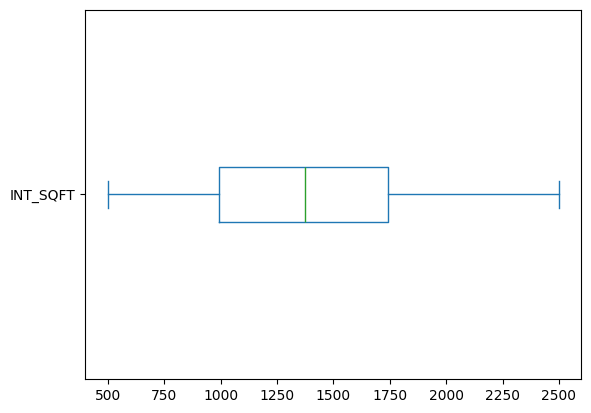

In [14]:
df.INT_SQFT.plot(kind='box',vert = False)
plt.show()

In [15]:
df.DATE_SALE 

0       04-05-2011
1       19-12-2006
2       04-02-2012
3       13-03-2010
4       05-10-2009
           ...    
7104    03-01-2011
7105    08-04-2004
7106    25-08-2006
7107    03-08-2009
7108    13-07-2005
Name: DATE_SALE, Length: 7103, dtype: object

In [16]:
# Change in Data type
df.DATE_SALE = pd.to_datetime(df.DATE_SALE,format='%d-%m-%Y')

In [17]:
df.DATE_SALE.value_counts()

DATE_SALE
2009-10-06    12
2010-11-17    10
2011-04-12    10
2009-01-06    10
2012-03-15    10
              ..
2005-02-04     1
2010-12-14     1
2012-10-06     1
2008-10-30     1
2013-08-04     1
Name: count, Length: 2797, dtype: int64

In [18]:
df['SALE_YEAR'] = df.DATE_SALE.dt.year
df['SALE_MONTH'] = df.DATE_SALE.dt.month
df['SALE_MONTH_NAME'] = df.DATE_SALE.dt.month_name()
df['SALE_DAY'] = df.DATE_SALE.dt.day
df['SALE_DAY_OF_WEEK'] = df.DATE_SALE.dt.dayofweek
df['SALE_DAY_NAME'] = df.DATE_SALE.dt.day_name()
df['SALE_QUARTER'] = df.DATE_SALE.dt.quarter


In [19]:
df.DIST_MAINROAD.value_counts()

DIST_MAINROAD
39     55
51     53
78     52
77     49
73     48
       ..
167    24
127    24
33     24
12     23
25     20
Name: count, Length: 201, dtype: int64

<Axes: >

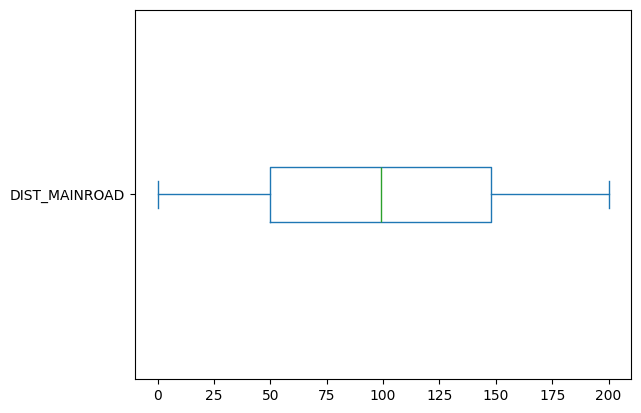

In [20]:
df.DIST_MAINROAD.plot(kind = 'box',vert = False)

In [21]:
df.N_BEDROOM.value_counts()

N_BEDROOM
1.0    3791
2.0    2351
3.0     707
4.0     254
Name: count, dtype: int64

In [22]:
df.N_BATHROOM.value_counts()

N_BATHROOM
1.0    5588
2.0    1515
Name: count, dtype: int64

In [23]:
df.N_ROOM.value_counts()

N_ROOM
4    2561
3    2122
5    1245
2     921
6     254
Name: count, dtype: int64

In [24]:
df.SALE_COND.value_counts()

SALE_COND
AdjLand        1433
Partial        1427
Normal Sale    1422
AbNormal       1405
Family         1402
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: count, dtype: int64

In [25]:
df.SALE_COND.replace({
    'Adj Land' : 'AdjLand',
    'Ab Normal' : 'AbNormal',
    'Partiall' : 'Partial',
    'PartiaLl' : 'Partial'
},inplace=True)
df.SALE_COND.value_counts()

SALE_COND
AdjLand        1439
Partial        1430
Normal Sale    1422
AbNormal       1410
Family         1402
Name: count, dtype: int64

In [26]:
df.PARK_FACIL.value_counts()

PARK_FACIL
Yes    3584
No     3517
Noo       2
Name: count, dtype: int64

In [27]:
df.PARK_FACIL.replace('Noo','No',inplace=True)
df.PARK_FACIL.value_counts()

PARK_FACIL
Yes    3584
No     3519
Name: count, dtype: int64

In [28]:
df.DATE_BUILD =pd.to_datetime(df.DATE_BUILD,format='%d-%m-%Y')

In [29]:
df['BUILD_YEAR'] = df.DATE_BUILD.dt.year
df['BUILD_MONTH'] = df.DATE_BUILD.dt.month
df['BUILD_MONTH_NAME'] = df.DATE_BUILD.dt.month_name()
df['BUILD_DAY'] = df.DATE_BUILD.dt.day
df['BUILD_DAY_OF_WEEK'] = df.DATE_BUILD.dt.dayofweek
df['BUILD_DAY_NAME'] = df.DATE_BUILD.dt.day_name()
df['BUILD_QUARTER'] = df.DATE_BUILD.dt.quarter

In [30]:
df.BUILDTYPE.value_counts()

BUILDTYPE
House         2443
Commercial    2325
Others        2305
Other           26
Comercial        4
Name: count, dtype: int64

In [31]:
df.BUILDTYPE.replace({
    'Other': 'Others',
    'Comercial' : 'Commercial'
},inplace= True)
df.BUILDTYPE.value_counts()

BUILDTYPE
House         2443
Others        2331
Commercial    2329
Name: count, dtype: int64

In [32]:
df.UTILITY_AVAIL.value_counts()

UTILITY_AVAIL
AllPub     1885
NoSeWa     1870
NoSewr     1826
ELO        1521
All Pub       1
Name: count, dtype: int64

In [33]:
df.UTILITY_AVAIL.replace({
    'All Pub' : 'AllPub'

},inplace=True)
df.UTILITY_AVAIL.value_counts()

UTILITY_AVAIL
AllPub     1886
NoSeWa     1870
NoSewr     1826
ELO        1521
Name: count, dtype: int64

In [34]:
df.STREET.value_counts()

STREET
Paved        2558
Gravel       2518
No Access    2008
Pavd           12
NoAccess        7
Name: count, dtype: int64

In [35]:
df.STREET.replace({
    'Pavd' : 'Paved',
    'NoAccess' : 'No Access'
},inplace=True)
df.STREET.value_counts()

STREET
Paved        2570
Gravel       2518
No Access    2015
Name: count, dtype: int64

In [36]:
df.MZZONE.value_counts()

MZZONE
RL    1856
RH    1822
RM    1813
C      550
A      537
I      525
Name: count, dtype: int64

In [37]:
df.QS_ROOMS.value_counts()

QS_ROOMS
2.5    265
3.8    259
3.6    255
4.6    252
3.9    245
4.9    242
4.7    239
4.2    239
3.4    239
3.3    238
4.8    238
2.6    237
2.1    235
3.1    230
3.0    228
5.0    228
3.5    227
2.8    226
4.3    225
2.3    223
4.1    222
2.9    220
4.4    219
4.0    218
4.5    218
2.2    213
2.4    208
3.2    207
3.7    205
2.0    203
2.7    200
Name: count, dtype: int64

<Axes: >

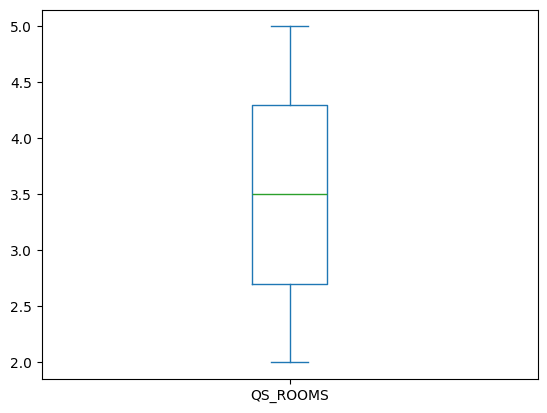

In [38]:
df.QS_ROOMS.plot(kind='box')

In [39]:
df.QS_BATHROOM.value_counts()

QS_BATHROOM
2.7    255
4.8    255
3.7    250
4.7    247
4.9    245
3.0    241
4.2    236
2.2    234
3.4    234
4.6    234
3.1    232
4.0    232
2.5    232
4.5    231
2.4    230
2.9    228
3.3    227
2.6    226
3.2    226
2.1    224
4.3    224
3.5    223
2.0    222
3.6    221
2.3    220
4.4    219
5.0    219
3.9    211
4.1    210
3.8    209
2.8    206
Name: count, dtype: int64

<Axes: >

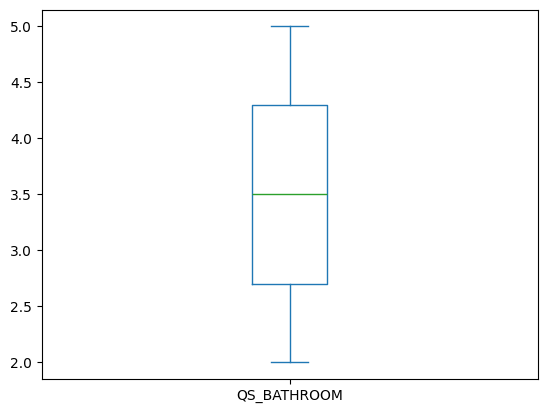

In [40]:
df.QS_BATHROOM.plot(kind='box')

<Axes: >

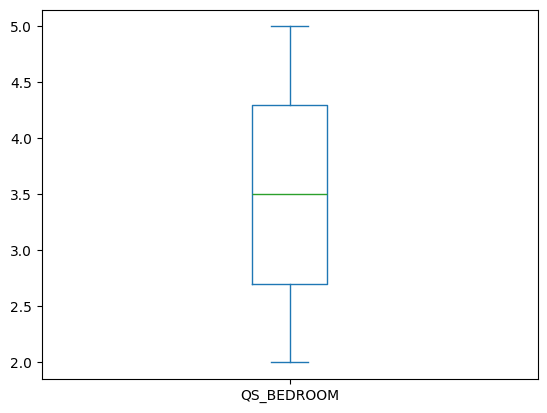

In [41]:
df.QS_BEDROOM.plot(kind='box')

<Axes: >

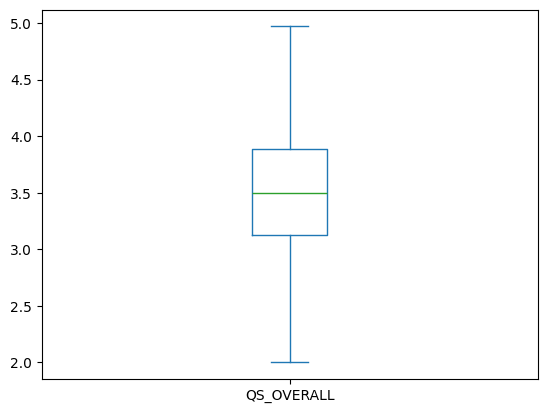

In [42]:
df.QS_OVERALL.plot(kind='box')

In [43]:
df.REG_FEE

0       380000
1       760122
2       421094
3       356321
4       237000
         ...  
7104    208767
7105    346191
7106    317354
7107    425350
7108    349177
Name: REG_FEE, Length: 7103, dtype: int64

<Axes: >

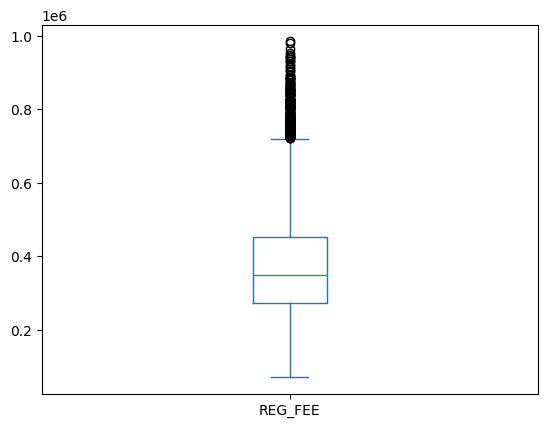

In [44]:
df.REG_FEE.plot(kind='box')

<Axes: >

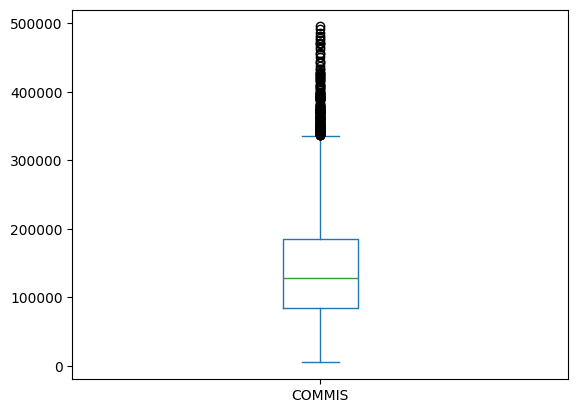

In [45]:
df.COMMIS.plot(kind='box')

<Axes: >

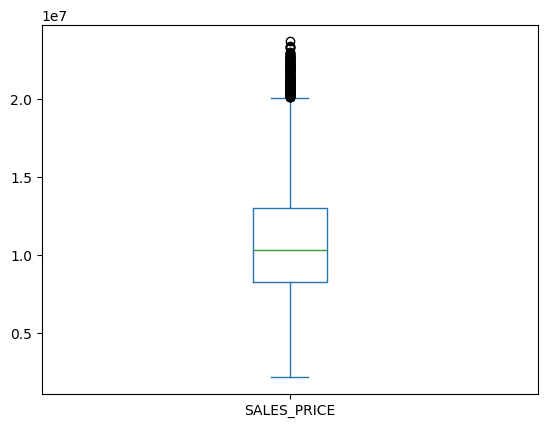

In [46]:
df.SALES_PRICE.plot(kind = 'box')

In [47]:
df['BUILDING_AGE'] = df.SALE_YEAR - df.BUILD_YEAR

In [48]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'SALE_YEAR', 'SALE_MONTH', 'SALE_MONTH_NAME', 'SALE_DAY',
       'SALE_DAY_OF_WEEK', 'SALE_DAY_NAME', 'SALE_QUARTER', 'BUILD_YEAR',
       'BUILD_MONTH', 'BUILD_MONTH_NAME', 'BUILD_DAY', 'BUILD_DAY_OF_WEEK',
       'BUILD_DAY_NAME', 'BUILD_QUARTER', 'BUILDING_AGE'],
      dtype='object')

In [49]:
df

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004 2011-05-04            131        1.0   
1     P09411  Anna Nagar      1986 2006-12-19             26        2.0   
2     P01812      Adayar       909 2012-02-04             70        1.0   
3     P05346   Velachery      1855 2010-03-13             14        3.0   
4     P06210  Karapakkam      1226 2009-10-05             84        1.0   
...      ...         ...       ...        ...            ...        ...   
7104  P03834  Karapakkam       598 2011-01-03             51        1.0   
7105  P10000   Velachery      1897 2004-04-08             52        3.0   
7106  P09594   Velachery      1614 2006-08-25            152        2.0   
7107  P06508  Karapakkam       787 2009-08-03             40        1.0   
7108  P09794   Velachery      1896 2005-07-13            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... SALE_DAY_NAME  \
0            1.0       3     AbNormal        Yes  ...     Wednesday   
1            1.0       5     AbNormal         No  ...       Tuesday   
2            1.0       3     AbNormal        Yes  ...      Saturday   
3            2.0       5       Family         No  ...      Saturday   
4            1.0       3     AbNormal        Yes  ...        Monday   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...        Monday   
7105         2.0       5       Family        Yes  ...      Thursday   
7106         1.0       4  Normal Sale         No  ...        Friday   
7107         1.0       2      Partial        Yes  ...        Monday   
7108         2.0       5      Partial        Yes  ...     Wednesday   

     SALE_QUARTER BUILD_YEAR BUILD_MONTH BUILD_MONTH_NAME  BUILD_DAY  \
0               2       1967           5              May         15   
1               4       1995          12         December         22   
2               1       1992           2         February          9   
3               1       1988           3            March         18   
4               4       1979          10          October         13   
...           ...        ...         ...              ...        ...   
7104            1       1962           1          January         15   
7105            2       1995           4            April         11   
7106            3       1978           9        September          1   
7107            3       1977           8           August         11   
7108            3       1961           7             July         24   

      BUILD_DAY_OF_WEEK  BUILD_DAY_NAME  BUILD_QUARTER  BUILDING_AGE  
0                     0          Monday              2            44  
1                     4          Friday              4            11  
2                     6          Sunday              1            20  
3                     4          Friday              1            22  
4                     5        Saturday              4            30  
...                 ...             ...            ...           ...  
7104                  0          Monday              1            49  
7105                  1         Tuesday              2             9  
7106                  4          Friday              3            28  
7107                  3        Thursday              3            32  
7108                  0          Monday              3            44  

[7103 rows x 37 columns]

# EDA

<Axes: xlabel='AREA'>

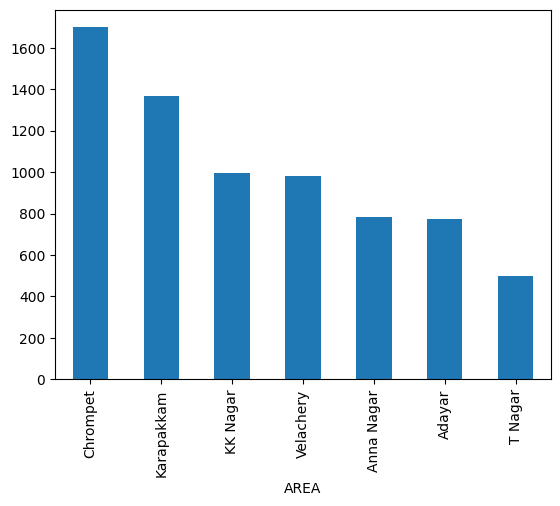

In [50]:
df.AREA.value_counts().plot(kind='bar')

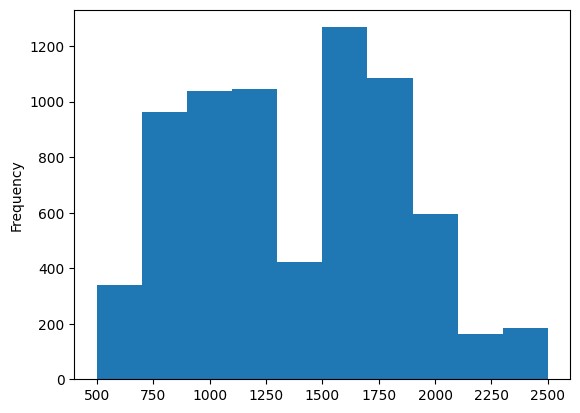

In [51]:
df.INT_SQFT.plot(kind='hist')
plt.show()

In [52]:
from scipy.stats import skew
skew(df.INT_SQFT)

np.float64(0.13106240100151367)

<Axes: ylabel='Frequency'>

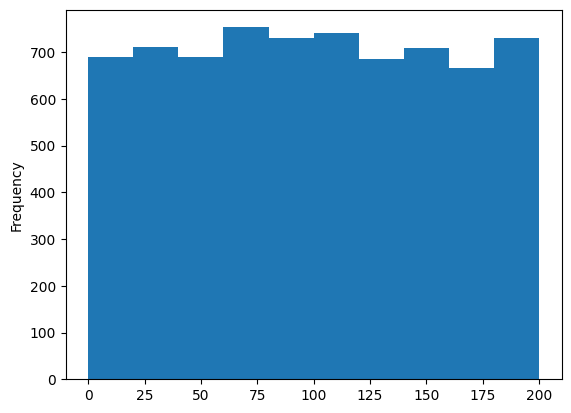

In [53]:
df.DIST_MAINROAD.plot(kind='hist')

<Axes: xlabel='N_BEDROOM'>

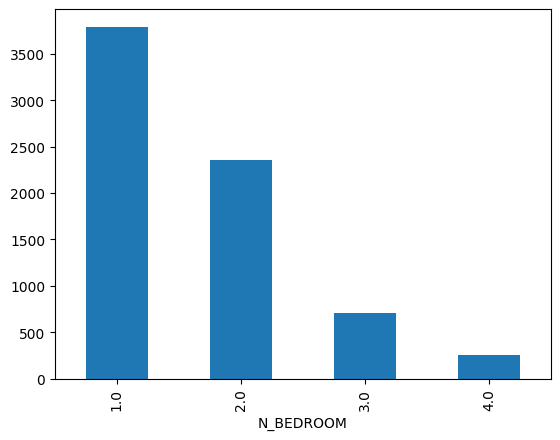

In [54]:
df.N_BEDROOM.value_counts().plot(kind='bar')

<Axes: xlabel='N_BATHROOM'>

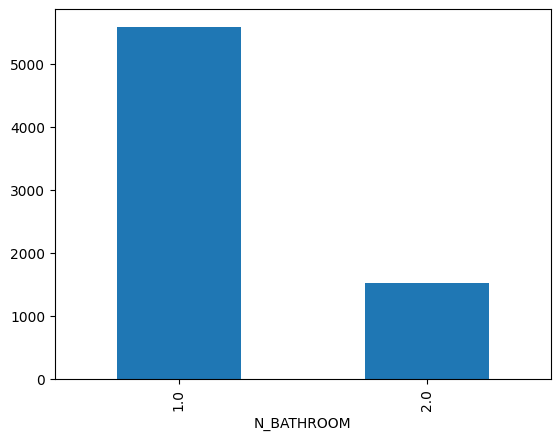

In [55]:
df.N_BATHROOM.value_counts().plot(kind='bar')

<Axes: xlabel='N_ROOM'>

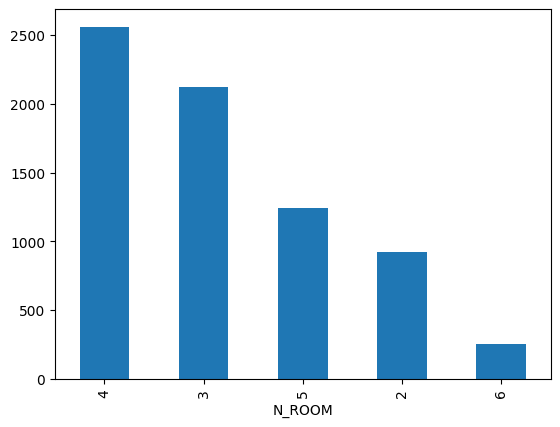

In [56]:
df.N_ROOM.value_counts().plot(kind='bar')

<Axes: xlabel='SALE_COND'>

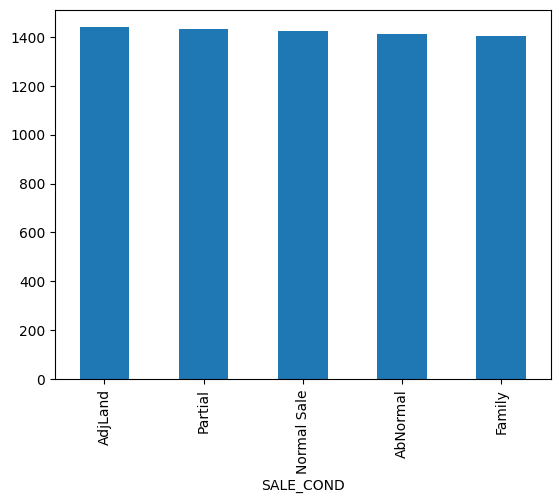

In [57]:
df.SALE_COND.value_counts().plot(kind = 'bar')

<Axes: xlabel='PARK_FACIL'>

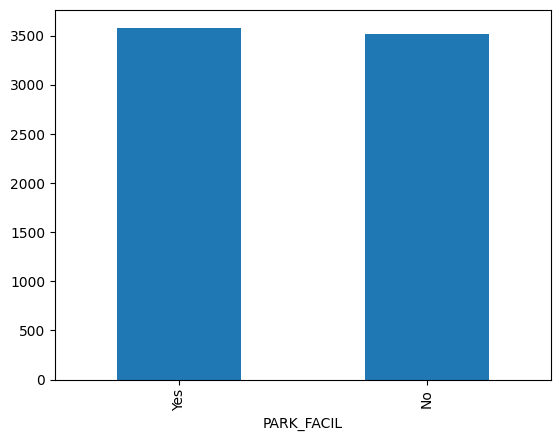

In [58]:
df.PARK_FACIL.value_counts().plot(kind='bar')

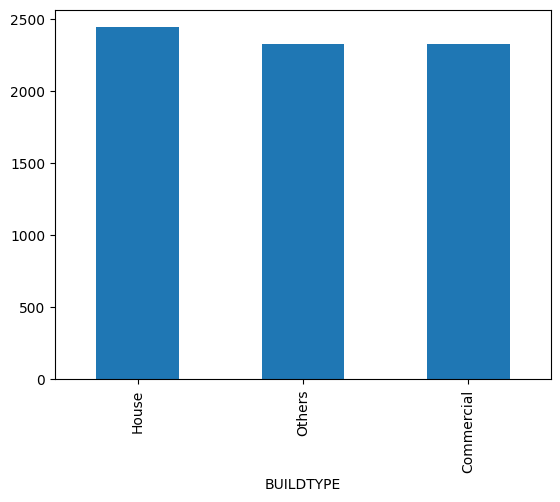

In [59]:
df.BUILDTYPE.value_counts().plot(kind='bar')
plt.show()


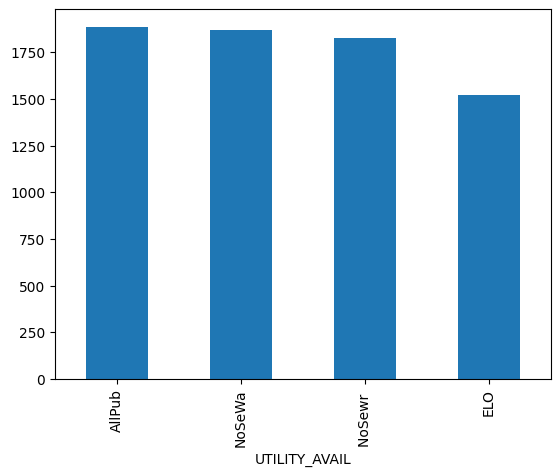

In [60]:
df.UTILITY_AVAIL.value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='STREET'>

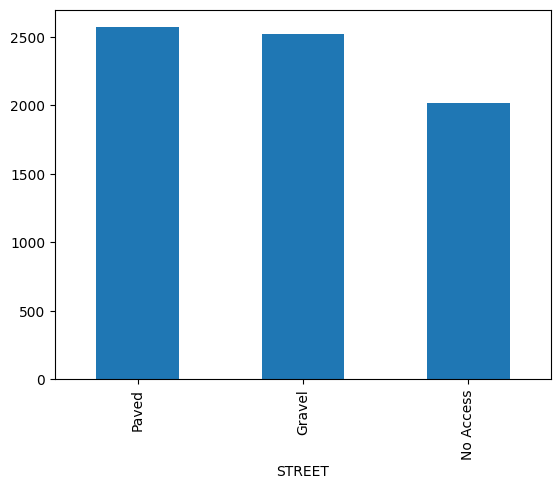

In [61]:
df.STREET.value_counts().plot(kind='bar')

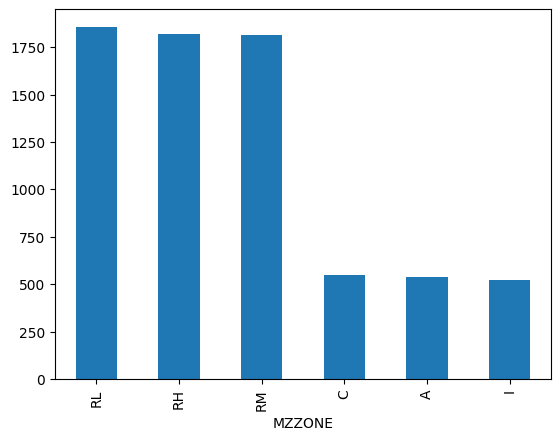

In [62]:
df.MZZONE.value_counts().plot(kind='bar')
plt.show()

<Axes: ylabel='Frequency'>

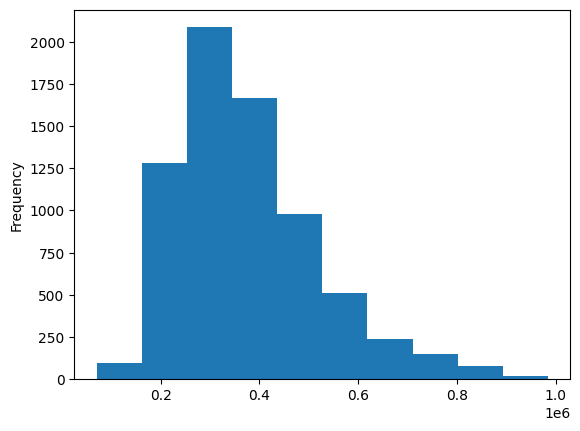

In [63]:
df.REG_FEE.plot(kind='hist')

In [64]:
from scipy.stats import skew,kurtosis
skew(df.REG_FEE),kurtosis(df.REG_FEE)

(np.float64(1.0375918810998548), np.float64(1.1251387170285243))

<Axes: ylabel='Frequency'>

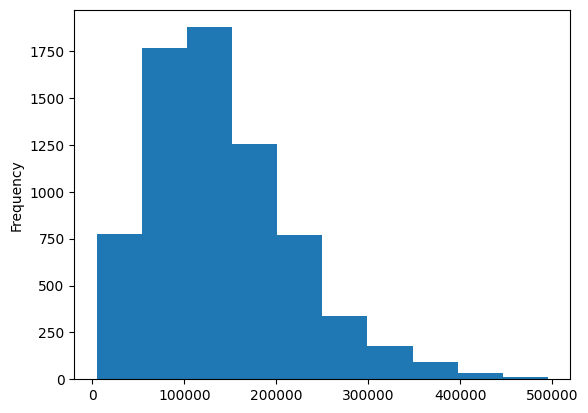

In [65]:
df.COMMIS.plot(kind='hist')

In [66]:
skew(df.COMMIS),kurtosis(df.COMMIS)

(np.float64(0.9508722319197819), np.float64(1.070164350828156))

<Axes: ylabel='Frequency'>

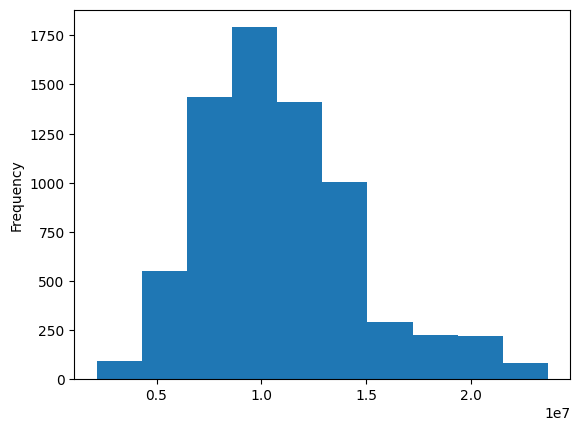

In [67]:
df.SALES_PRICE.plot(kind='hist')

In [68]:
skew(df.SALES_PRICE),kurtosis(df.SALES_PRICE)

(np.float64(0.7731572209058251), np.float64(0.5860375427013111))

<Axes: xlabel='AREA'>

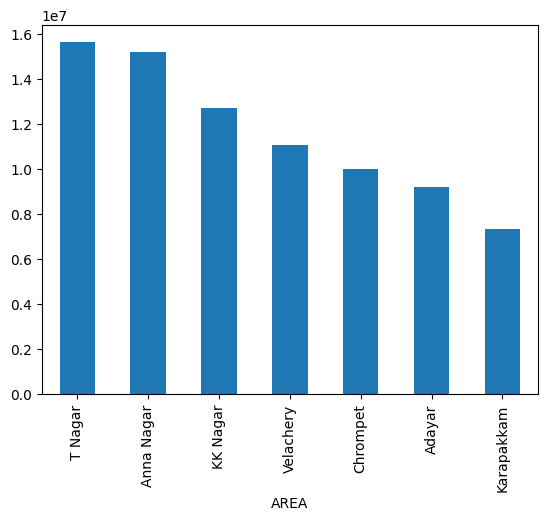

In [69]:
# Area Vs Sales Price
df.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=False).plot(kind='bar')

In [70]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

fig = px.line(df, x='SALE_YEAR', y = 'SALES_PRICE',color='AREA')
fig.show()

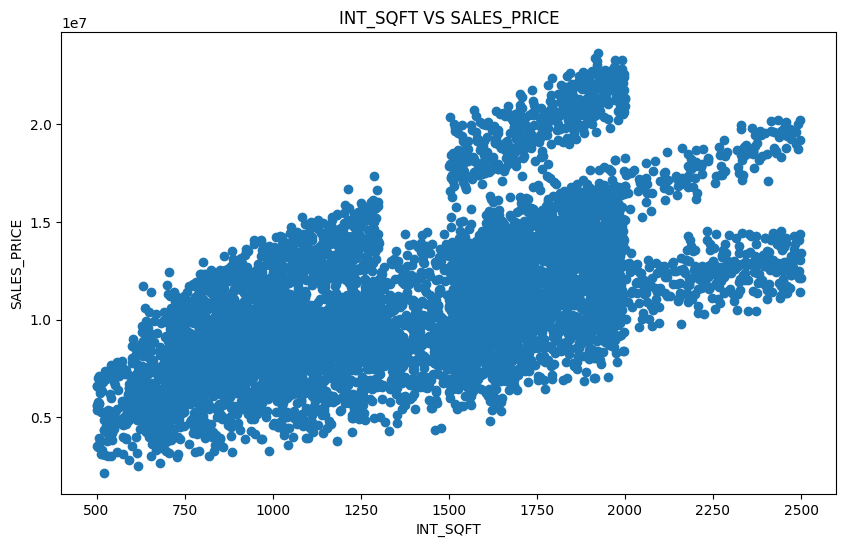

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(data=df,x='INT_SQFT',y='SALES_PRICE')
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.title('INT_SQFT VS SALES_PRICE')
plt.show()

<Axes: xlabel='SALE_YEAR', ylabel='SALES_PRICE'>

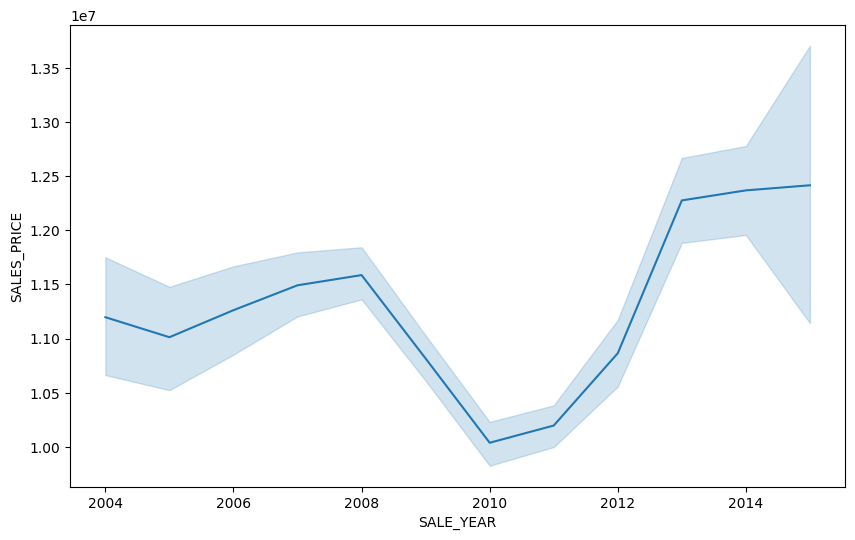

In [72]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x = 'SALE_YEAR', y = 'SALES_PRICE')


<Axes: xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

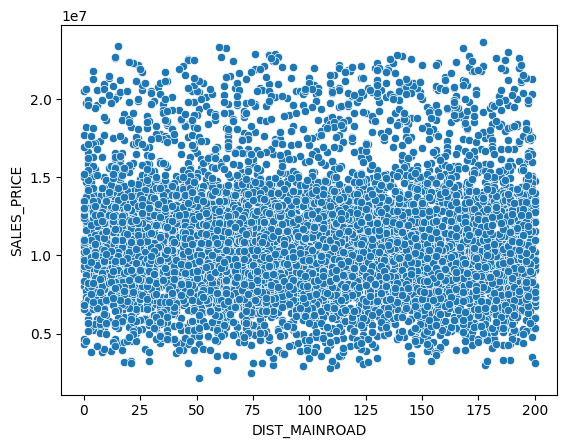

In [73]:
sns.scatterplot(data=df,x = 'DIST_MAINROAD',y = 'SALES_PRICE')

<Axes: xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

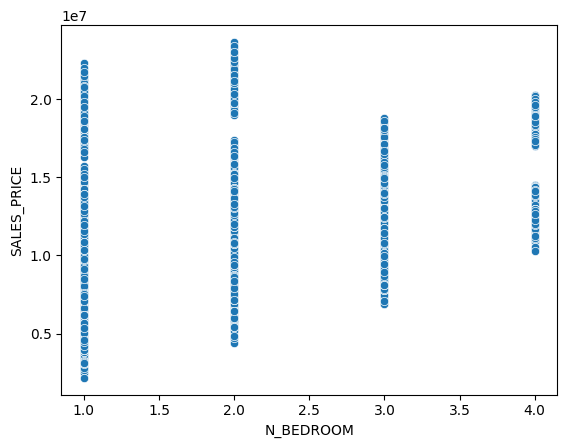

In [74]:
sns.scatterplot(data=df,x = 'N_BEDROOM',y = 'SALES_PRICE')

<Axes: xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

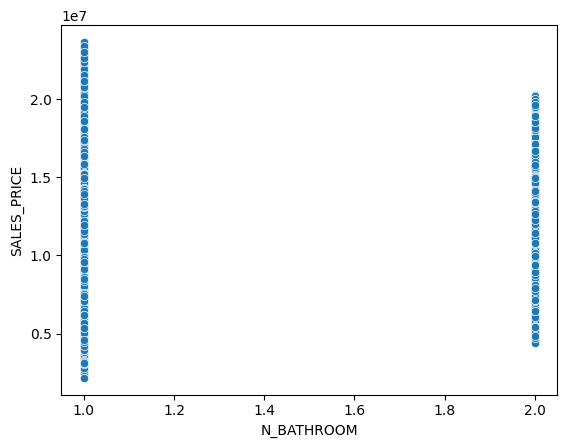

In [75]:
sns.scatterplot(data=df,x = 'N_BATHROOM',y = 'SALES_PRICE')

<Axes: xlabel='N_ROOM', ylabel='SALES_PRICE'>

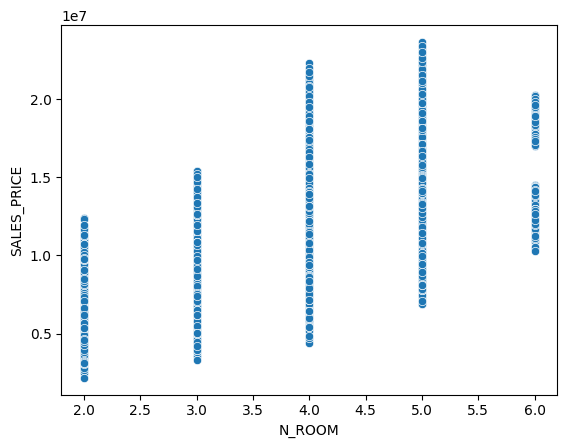

In [76]:
sns.scatterplot(data=df,x = 'N_ROOM',y = 'SALES_PRICE')

<Axes: xlabel='SALE_COND'>

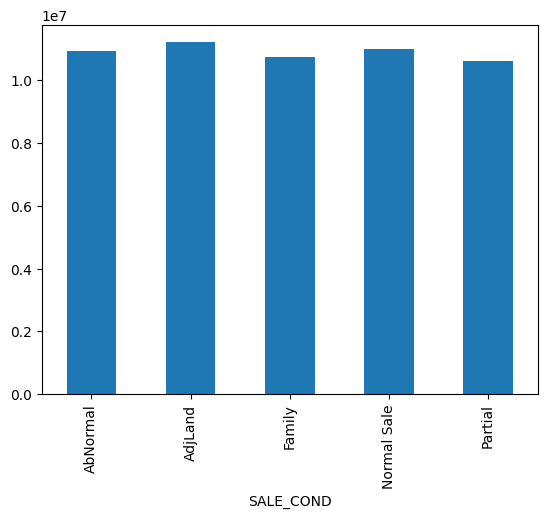

In [77]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().plot(kind = 'bar')

<Axes: xlabel='PARK_FACIL'>

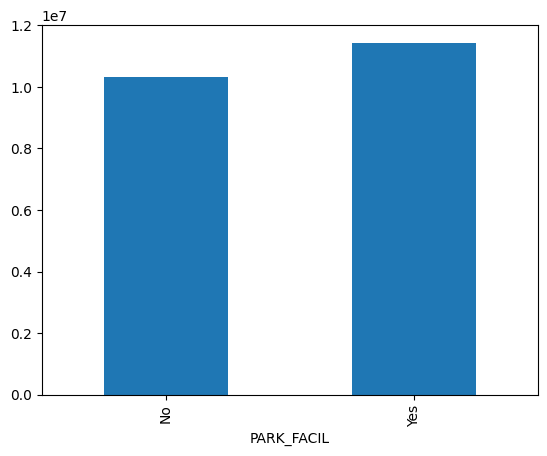

In [78]:
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot(kind='bar')

<Axes: xlabel='BUILDTYPE'>

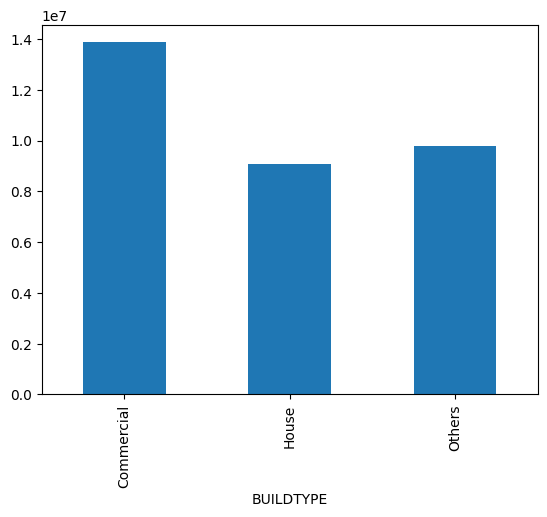

In [79]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().plot(kind='bar')

<Axes: xlabel='UTILITY_AVAIL'>

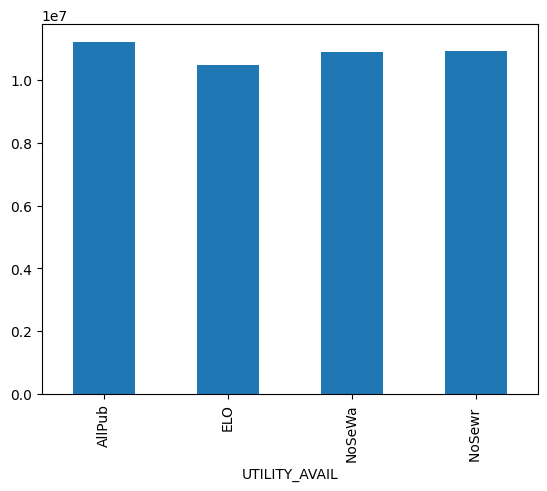

In [80]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot(kind='bar')

<Axes: xlabel='STREET'>

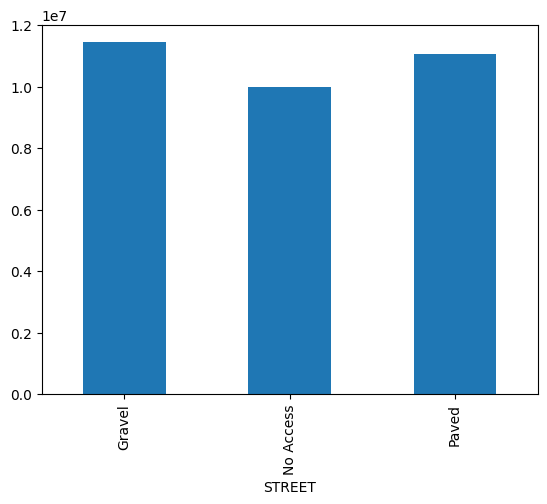

In [81]:
df.groupby('STREET')['SALES_PRICE'].mean().plot(kind='bar')

<Axes: xlabel='MZZONE'>

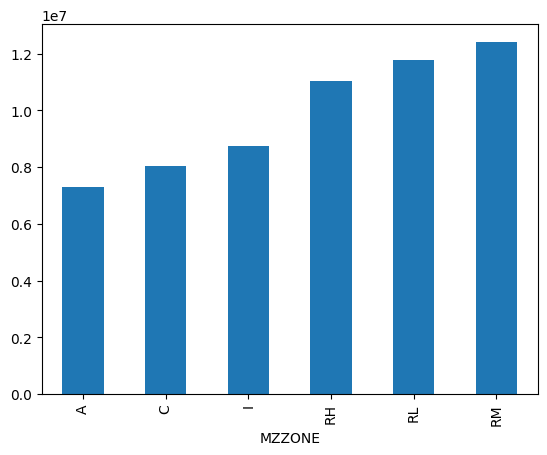

In [82]:
df.groupby('MZZONE')['SALES_PRICE'].mean().plot(kind='bar')

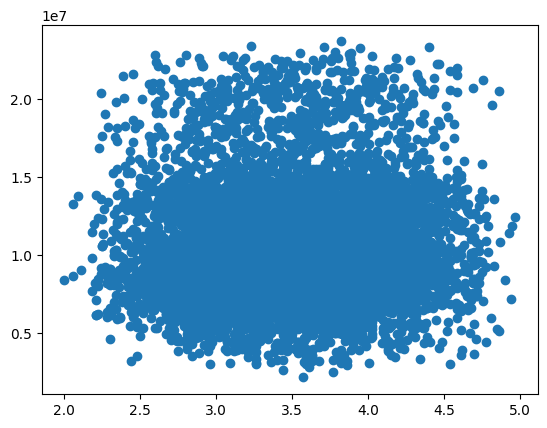

In [83]:
plt.scatter(data=df,x='QS_OVERALL',y='SALES_PRICE')

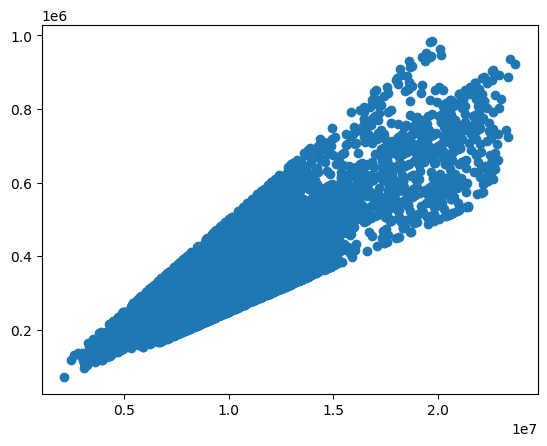

In [84]:
plt.scatter(data=df,x = 'SALES_PRICE',y='REG_FEE')

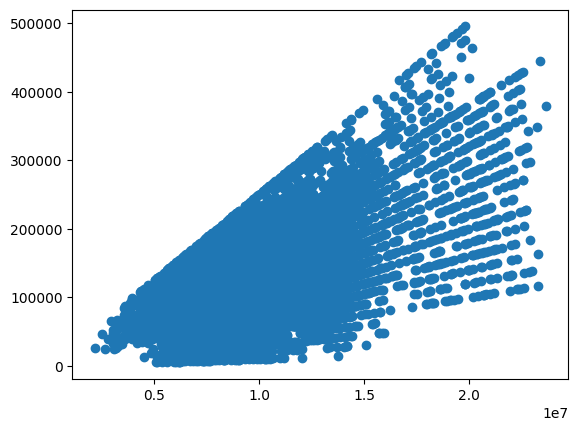

In [85]:
plt.scatter(data=df,x = 'SALES_PRICE',y='COMMIS')

<Axes: xlabel='BUILDING_AGE'>

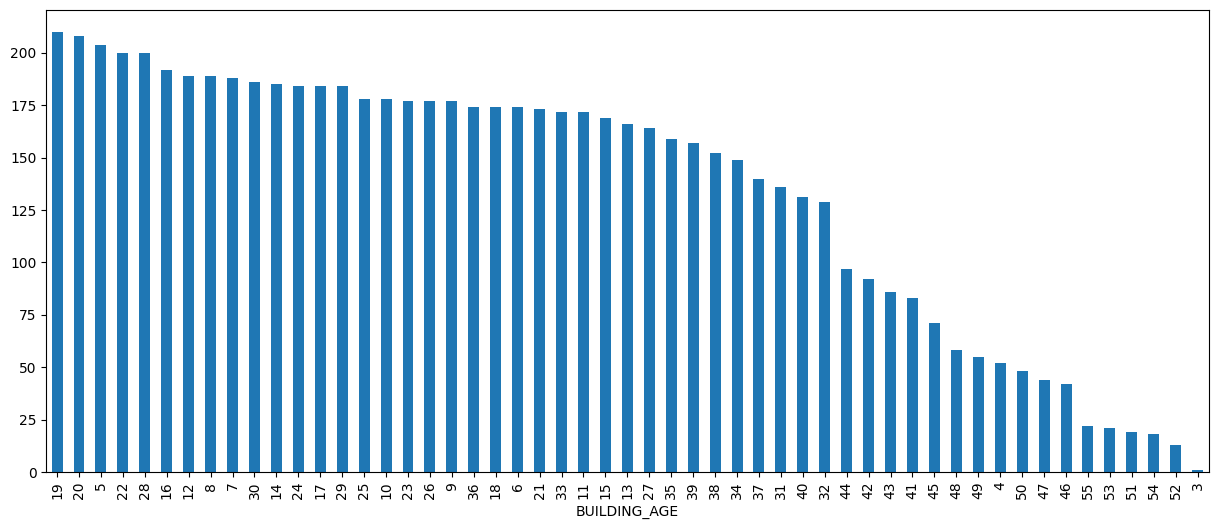

In [86]:
df.BUILDING_AGE.value_counts().plot(kind='bar',figsize=(15,6))

<Axes: ylabel='Frequency'>

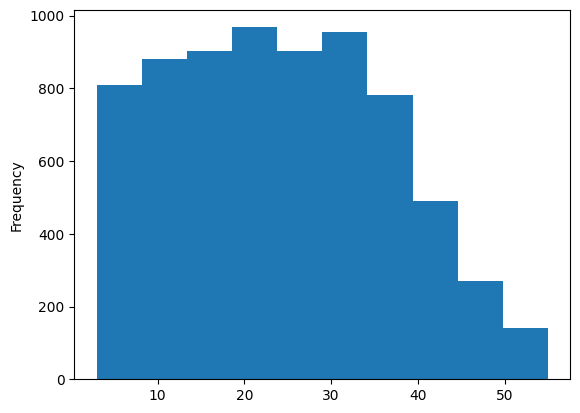

In [87]:
df.BUILDING_AGE.plot(kind='hist')

In [88]:
skew(df.BUILDING_AGE),kurtosis(df.BUILDING_AGE)

(np.float64(0.2671517479263784), np.float64(-0.8413748871177256))

In [89]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'SALE_YEAR', 'SALE_MONTH', 'SALE_MONTH_NAME', 'SALE_DAY',
       'SALE_DAY_OF_WEEK', 'SALE_DAY_NAME', 'SALE_QUARTER', 'BUILD_YEAR',
       'BUILD_MONTH', 'BUILD_MONTH_NAME', 'BUILD_DAY', 'BUILD_DAY_OF_WEEK',
       'BUILD_DAY_NAME', 'BUILD_QUARTER', 'BUILDING_AGE'],
      dtype='object')

<Axes: xlabel='SALE_YEAR'>

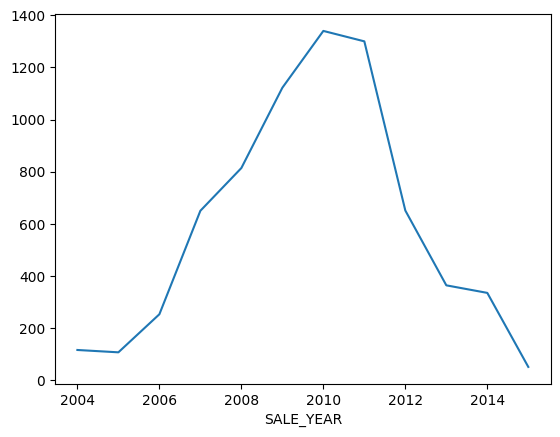

In [90]:
df.SALE_YEAR.value_counts().sort_index().plot(kind='line')

In [91]:
# Yearwise, Areawise and Price wise data is given
fig = px.line(df.groupby(['SALE_YEAR','AREA'])['SALES_PRICE'].mean().reset_index(), x = 'SALE_YEAR', y='SALES_PRICE', color='AREA', title='Chennai House Price by Area')
fig.show()

In [92]:
fig = px.line(df.groupby(['BUILDING_AGE','AREA'])['SALES_PRICE'].mean().reset_index(), x = 'BUILDING_AGE', y = 'SALES_PRICE', color = 'AREA')
fig.show()

In [93]:
fig = px.scatter(df,x='INT_SQFT',y='SALES_PRICE',color='AREA')
fig.show()

In [94]:
fig = px.bar(df,x='UTILITY_AVAIL',y='SALES_PRICE',color='AREA')
fig.show()

In [95]:
fig = px.imshow(df.pivot_table(index='SALE_YEAR',columns='AREA',values='SALES_PRICE',aggfunc='mean'),text_auto=True)
fig.show()

In [96]:
fig = px.imshow(df.pivot_table(index='AREA',columns='BUILDING_AGE',values='SALES_PRICE',aggfunc='mean'),text_auto=True)
fig.show()


In [97]:
df.SALE_DAY_NAME.value_counts()

SALE_DAY_NAME
Friday       1062
Thursday     1058
Tuesday      1037
Monday       1021
Sunday       1003
Wednesday     977
Saturday      945
Name: count, dtype: int64

In [98]:
fig = px.imshow(df.groupby(['SALE_DAY_NAME','BUILDTYPE'])['SALES_PRICE'].mean().reset_index().pivot_table(index = 'BUILDTYPE',columns = 'SALE_DAY_NAME',values = 'SALES_PRICE'),text_auto=True)
fig.show()

In [99]:
df.select_dtypes(include=['int32','int64',float]).columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'SALE_YEAR', 'SALE_MONTH', 'SALE_DAY',
       'SALE_DAY_OF_WEEK', 'SALE_QUARTER', 'BUILD_YEAR', 'BUILD_MONTH',
       'BUILD_DAY', 'BUILD_DAY_OF_WEEK', 'BUILD_QUARTER', 'BUILDING_AGE'],
      dtype='object')

<Axes: >

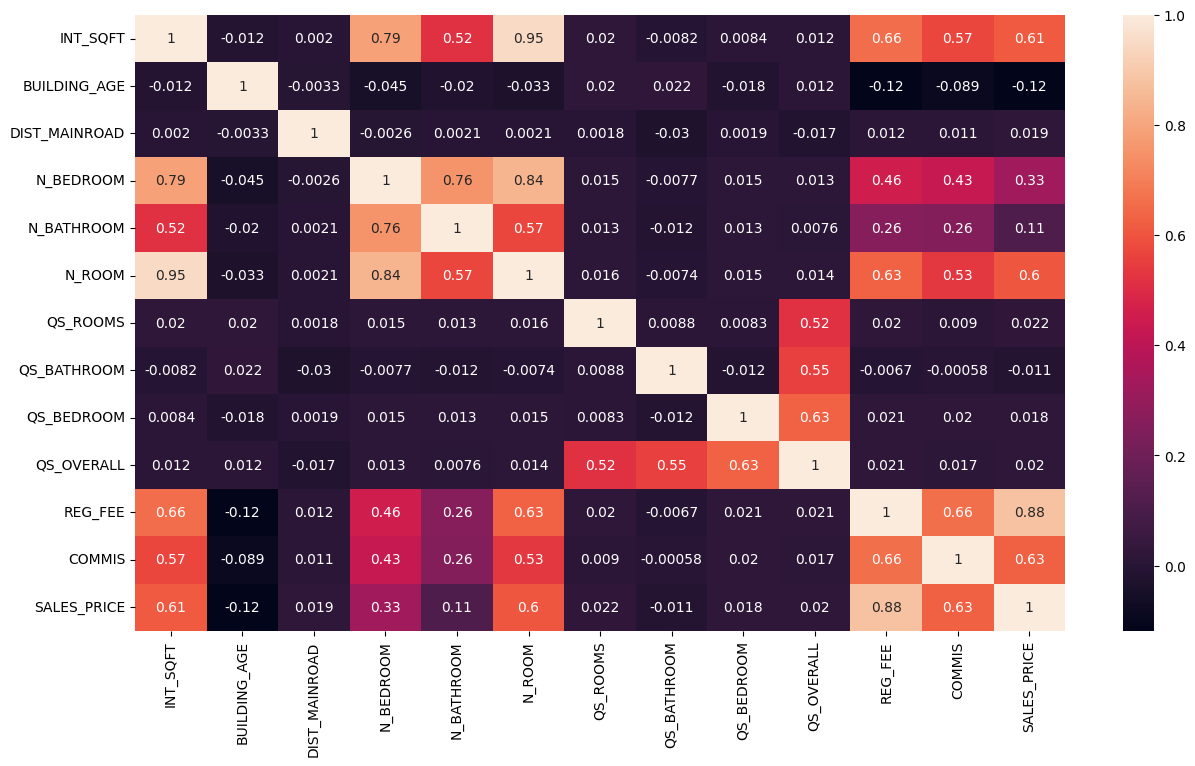

In [100]:
corr_df = df[['INT_SQFT', 'BUILDING_AGE','DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df,annot=True)

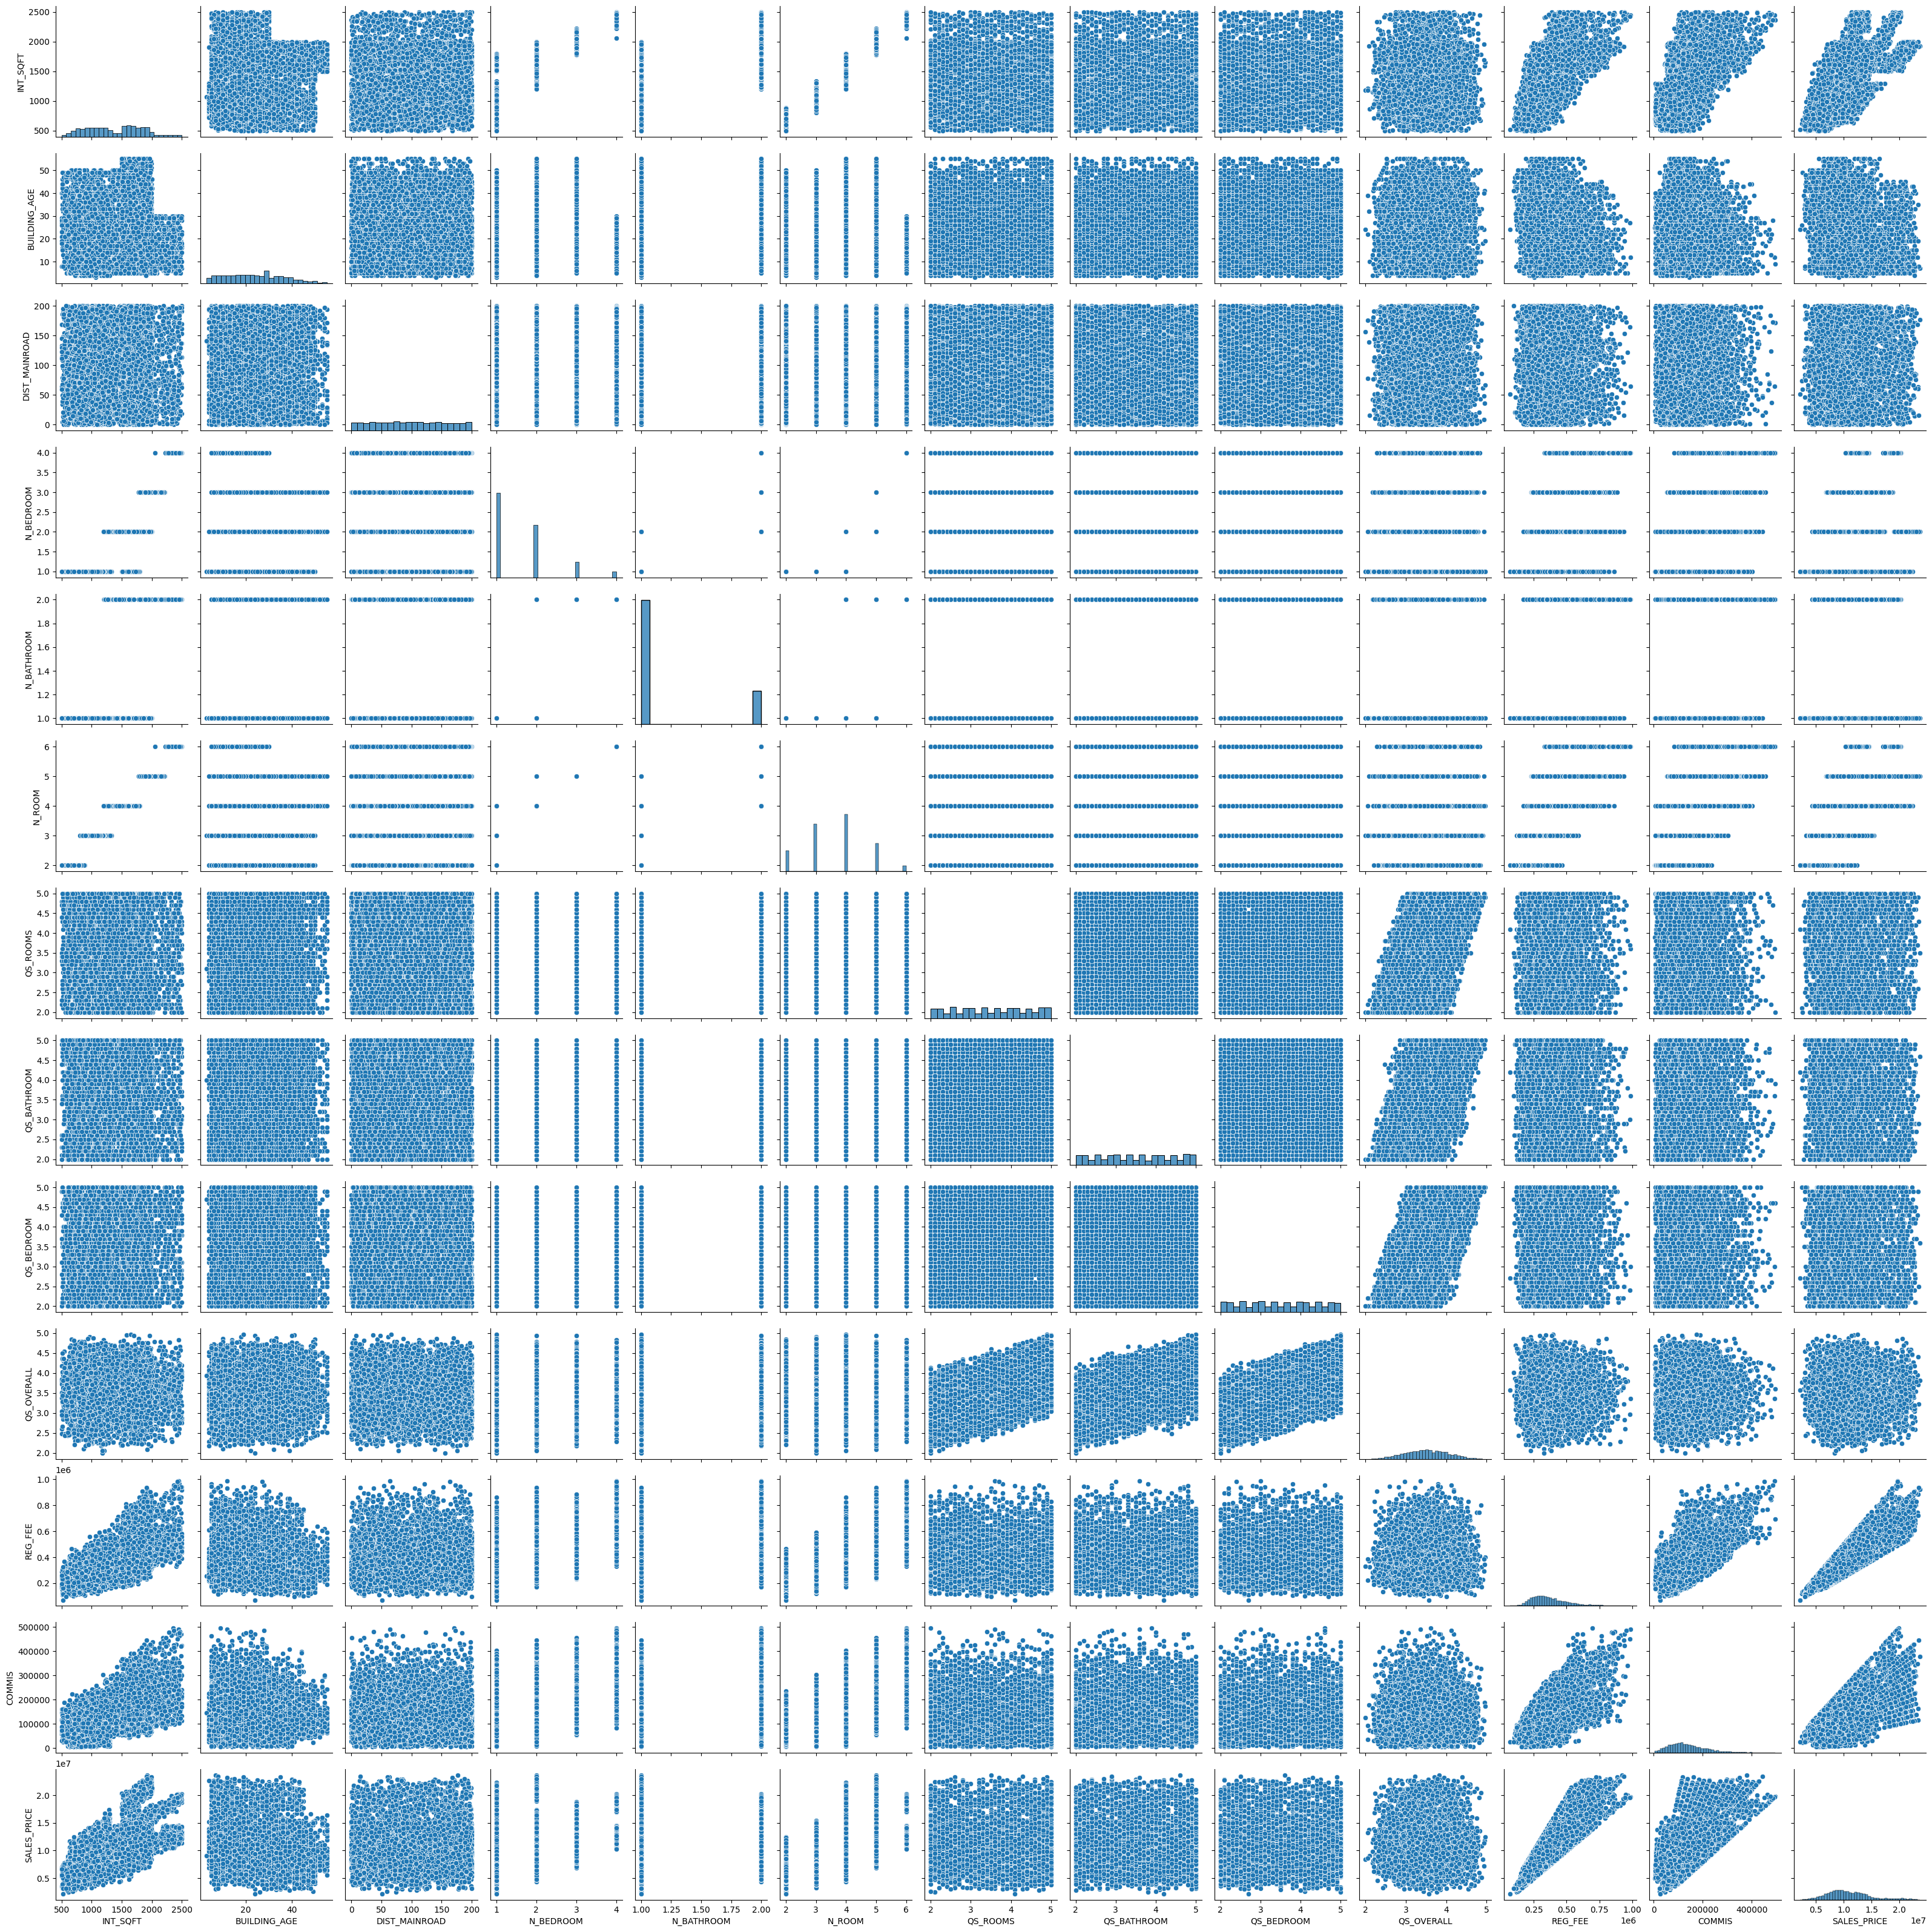

In [101]:
sns.pairplot(df[['INT_SQFT', 'BUILDING_AGE','DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE']])

In [102]:
df.select_dtypes(include=['object']).columns

Index(['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALE_MONTH_NAME', 'SALE_DAY_NAME',
       'BUILD_MONTH_NAME', 'BUILD_DAY_NAME'],
      dtype='object')

In [103]:
cat_column = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', ]

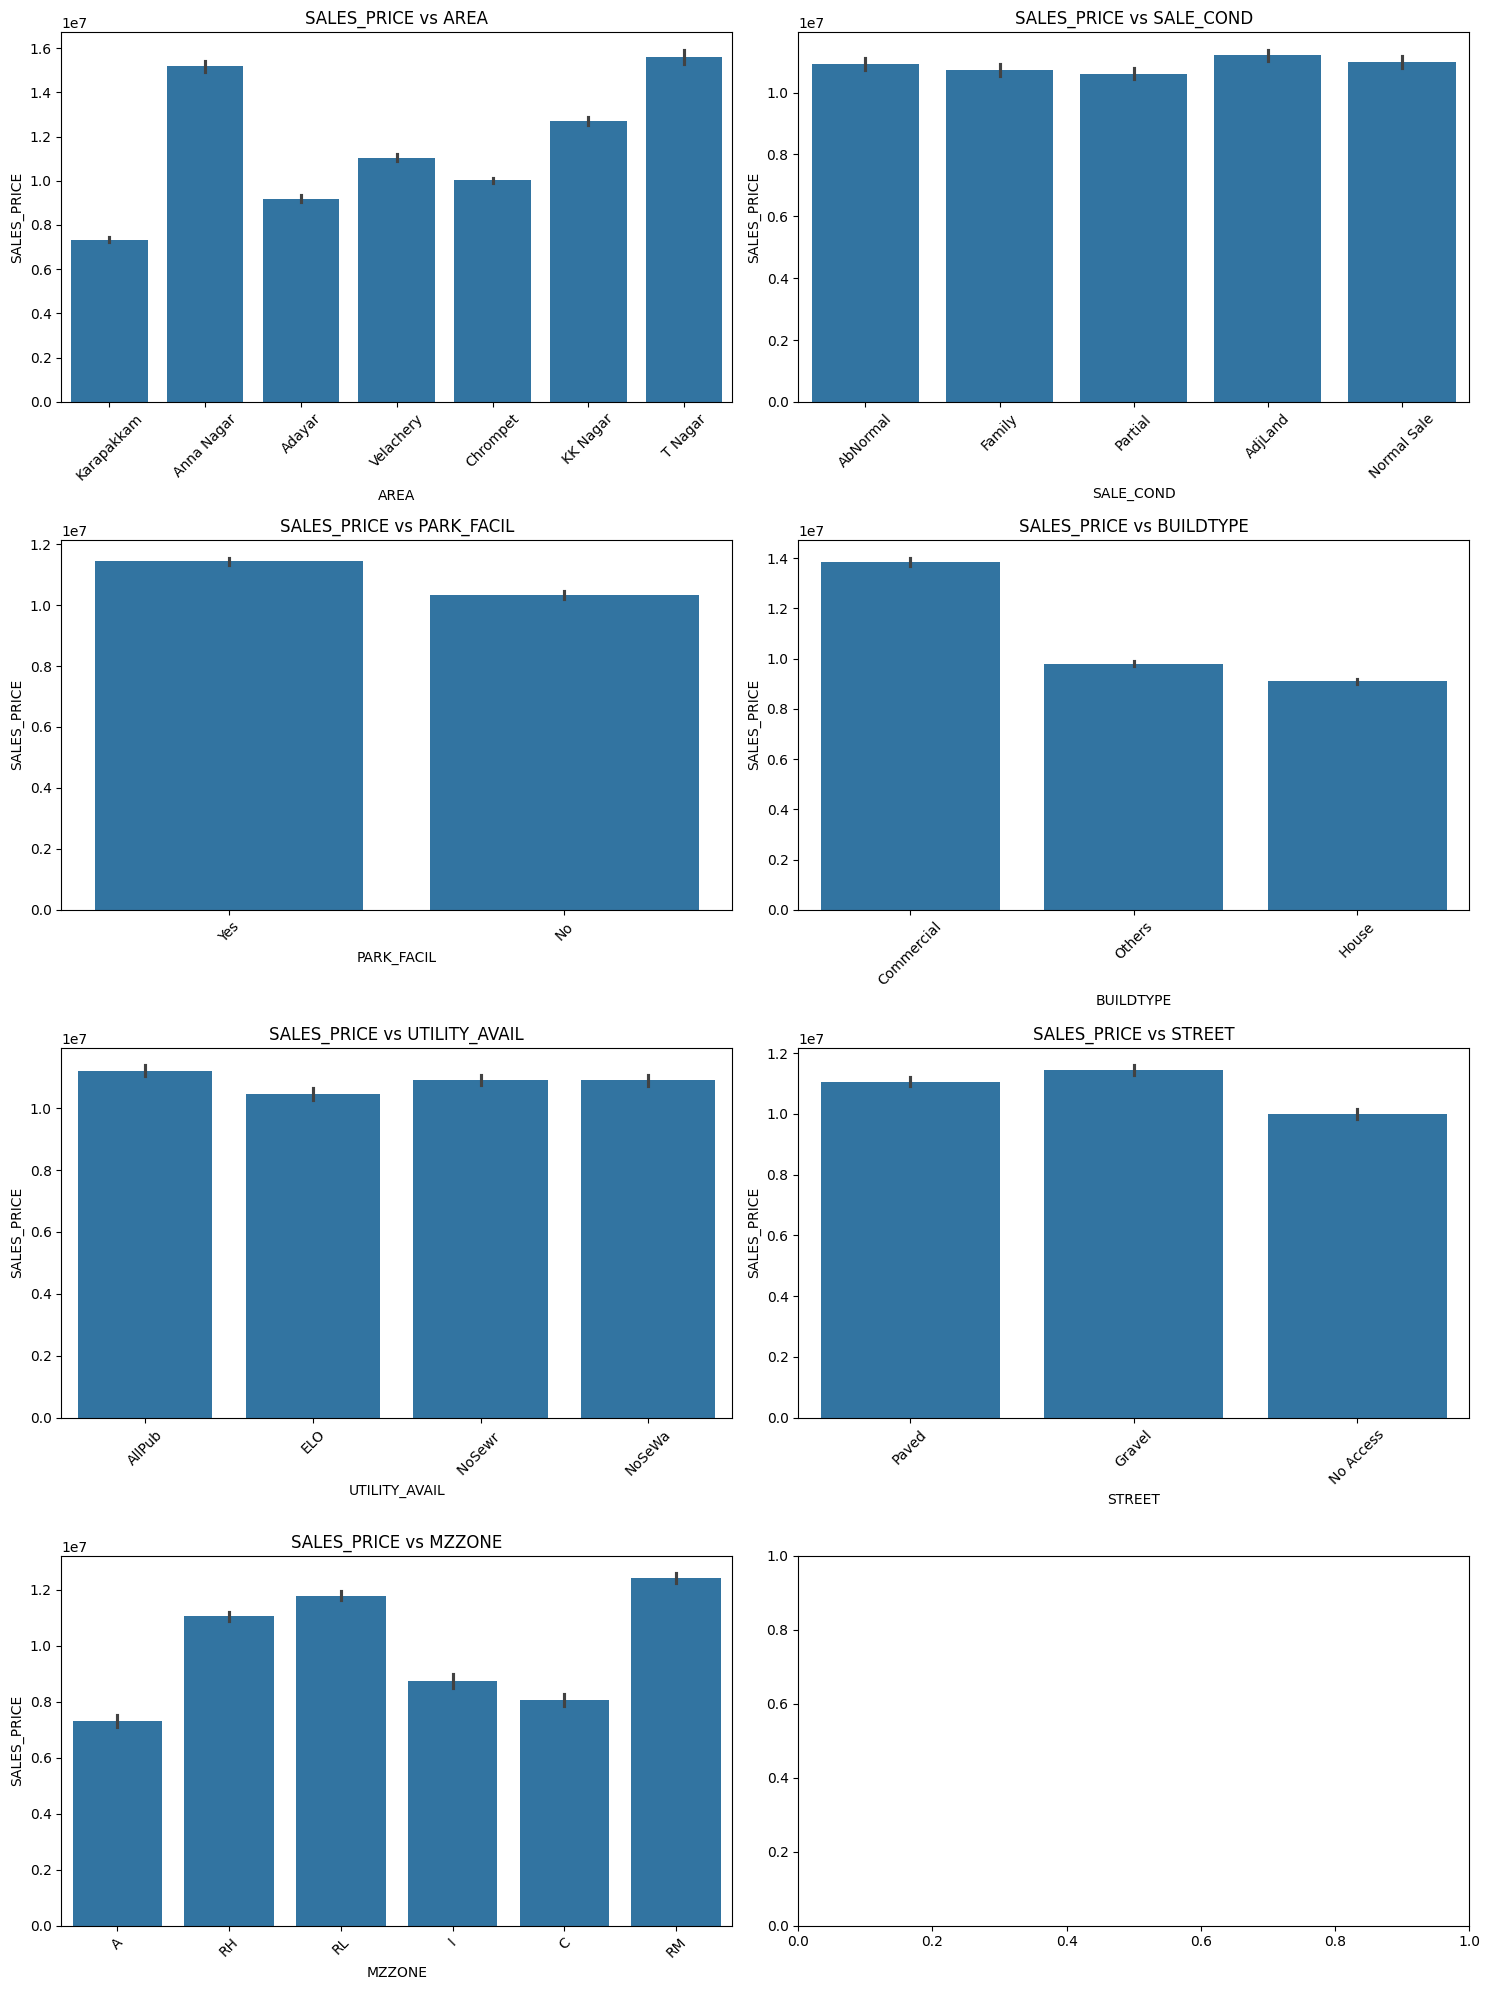

In [104]:
n_cols = 2
n_rows = (len(cat_column) + 1) // n_cols  # Round up number of rows

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
ax = ax.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(cat_column):
    sns.barplot(data=df, x=col, y='SALES_PRICE', ax=ax[i])
    ax[i].set_title(f'SALES_PRICE vs {col}')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

####  Two sample t test on Park faci column

In [105]:
df[df.PARK_FACIL == 'Yes']['SALES_PRICE'].values

array([ 7600000, 13159200,  7406250, ..., 10818480,  8507000,  9976480],
      shape=(3584,))

In [121]:
from scipy.stats import ttest_ind

# Class A and B scores
class_a = df[df.PARK_FACIL == 'Yes']['SALES_PRICE'].values
class_b = df[df.PARK_FACIL == 'No']['SALES_PRICE'].values

# Perform two-sample t-test (assume equal variances)
t_stat, p_val = ttest_ind(class_a, class_b)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The class averages are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

t-statistic: 12.4689
p-value: 0.000000
Reject the null hypothesis: The class averages are significantly different.


#### Anova test for STREET column

In [107]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [108]:
df[df['STREET'] == 'Paved'].SALES_PRICE.values

array([ 7600000,  9630290,  8308970, ..., 13944780,  8507000,  9976480],
      shape=(2570,))

In [125]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
class_a = df[df['STREET'] == 'Paved'].SALES_PRICE.values
class_b = df[df['STREET'] == 'Gravel'].SALES_PRICE.values
class_c = df[df['STREET'] == 'No Access'].SALES_PRICE.values

# Perform one-way ANOVA
f_stat, p_val = f_oneway(class_a, class_b, class_c)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 87.8707
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.


In [110]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [111]:
df[df['UTILITY_AVAIL'] == 'AllPub'].SALES_PRICE.values

array([ 7600000, 21717770,  7406250, ...,  5688470, 13174060, 14111320],
      shape=(1886,))

In [124]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
class_a = df[df['UTILITY_AVAIL'] == 'AllPub'].SALES_PRICE.values
class_b = df[df['UTILITY_AVAIL'] == 'ELO'].SALES_PRICE.values
class_c = df[df['UTILITY_AVAIL'] == 'NoSewr '].SALES_PRICE.values
class_d = df[df['UTILITY_AVAIL'] == 'NoSeWa'].SALES_PRICE.values

# Perform one-way ANOVA
f_stat, p_val = f_oneway(class_a, class_b, class_c,class_d)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 10.8857
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.


In [120]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
class_a = df[df['SALE_COND'] == 'AdjLand'].SALES_PRICE.values
class_b = df[df['SALE_COND'] == 'Partial'].SALES_PRICE.values
class_c = df[df['SALE_COND'] == 'Normal Sale '].SALES_PRICE.values
class_d = df[df['SALE_COND'] == 'AbNormal'].SALES_PRICE.values
class_e = df[df['SALE_COND'] == 'Family'].SALES_PRICE.values

# Perform one-way ANOVA
f_stat, p_val = f_oneway(class_a, class_b, class_c,class_d,class_e)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: nan
p-value: nan
Fail to reject the null hypothesis: No significant difference.


BUILDTYPE

In [122]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
class_a = df[df['BUILDTYPE'] == 'House'].SALES_PRICE.values
class_b = df[df['BUILDTYPE'] == 'Others'].SALES_PRICE.values
class_c = df[df['BUILDTYPE'] == 'Commercial '].SALES_PRICE.values

# Perform one-way ANOVA
f_stat, p_val = f_oneway(class_a, class_b, class_c)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: nan
p-value: nan
Fail to reject the null hypothesis: No significant difference.


In [123]:
df[df['BUILDTYPE'] == 'House'].SALES_PRICE.values

array([ 8656000, 12601080,  8848285, ...,  7371800,  5643500,  8351410],
      shape=(2443,))

MZZONE

In [127]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
class_a = df[df['MZZONE'] == 'RL'].SALES_PRICE.values
class_b = df[df['MZZONE'] == 'RH'].SALES_PRICE.values
class_c = df[df['MZZONE'] == 'RM'].SALES_PRICE.values
class_d = df[df['MZZONE'] == 'C'].SALES_PRICE.values
class_e = df[df['MZZONE'] == 'A'].SALES_PRICE.values
class_f = df[df['MZZONE'] == 'I'].SALES_PRICE.values


# Perform one-way ANOVA
f_stat, p_val = f_oneway(class_a, class_b, class_c,class_d,class_e,class_f)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 339.1598
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.


## Prep Data for ML

In [113]:
df.AREA.value_counts().reset_index() # for Freq Encoding

AREA  count
0    Chrompet   1699
1  Karapakkam   1366
2    KK Nagar    997
3   Velachery    981
4  Anna Nagar    785
5      Adayar    774
6     T Nagar    501

In [114]:
df.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=True).reset_index() # for Target Envcoding

AREA   SALES_PRICE
0  Karapakkam  7.340100e+06
1      Adayar  9.185668e+06
2    Chrompet  1.001515e+07
3   Velachery  1.104735e+07
4    KK Nagar  1.269623e+07
5  Anna Nagar  1.517704e+07
6     T Nagar  1.561674e+07

## Encoding

### Area Coluumn

In [115]:
df.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=False).reset_index() # for Target Envcoding

AREA   SALES_PRICE
0     T Nagar  1.561674e+07
1  Anna Nagar  1.517704e+07
2    KK Nagar  1.269623e+07
3   Velachery  1.104735e+07
4    Chrompet  1.001515e+07
5      Adayar  9.185668e+06
6  Karapakkam  7.340100e+06

In [116]:
df.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=False).reset_index().AREA.values

array(['T Nagar', 'Anna Nagar', 'KK Nagar', 'Velachery', 'Chrompet',
       'Adayar', 'Karapakkam'], dtype=object)

In [117]:
ml_df.AREA = ml_df.AREA.map(
                    {
                        'T Nagar' : 1, 
                        'Anna Nagar' : 2,
                        'KK Nagar' : 3, 
                        'Velachery' : 4, 
                        'Chrompet' : 5,
                    'Adayar' : 6, 
                    'Karapakkam' : 7
                    }
                )

NameError: name 'ml_df' is not defined

In [ ]:
ml_df

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     P03210   NaN      1004 2011-05-04            131        1.0         1.0   
1     P09411   NaN      1986 2006-12-19             26        2.0         1.0   
2     P01812   NaN       909 2012-02-04             70        1.0         1.0   
3     P05346   NaN      1855 2010-03-13             14        3.0         2.0   
4     P06210   NaN      1226 2009-10-05             84        1.0         1.0   
...      ...   ...       ...        ...            ...        ...         ...   
7104  P03834   NaN       598 2011-01-03             51        1.0         1.0   
7105  P10000   NaN      1897 2004-04-08             52        3.0         2.0   
7106  P09594   NaN      1614 2006-08-25            152        2.0         1.0   
7107  P06508   NaN       787 2009-08-03             40        1.0         1.0   
7108  P09794   NaN      1896 2005-07-13            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  ... SALE_DAY_NAME SALE_QUARTER  \
0          3     AbNormal        Yes  ...     Wednesday            2   
1          5     AbNormal         No  ...       Tuesday            4   
2          3     AbNormal        Yes  ...      Saturday            1   
3          5       Family         No  ...      Saturday            1   
4          3     AbNormal        Yes  ...        Monday            4   
...      ...          ...        ...  ...           ...          ...   
7104       2      AdjLand         No  ...        Monday            1   
7105       5       Family        Yes  ...      Thursday            2   
7106       4  Normal Sale         No  ...        Friday            3   
7107       2      Partial        Yes  ...        Monday            3   
7108       5      Partial        Yes  ...     Wednesday            3   

     BUILD_YEAR BUILD_MONTH BUILD_MONTH_NAME  BUILD_DAY  BUILD_DAY_OF_WEEK  \
0          1967           5              May         15                  0   
1          1995          12         December         22                  4   
2          1992           2         February          9                  6   
3          1988           3            March         18                  4   
4          1979          10          October         13                  5   
...         ...         ...              ...        ...                ...   
7104       1962           1          January         15                  0   
7105       1995           4            April         11                  1   
7106       1978           9        September          1                  4   
7107       1977           8           August         11                  3   
7108       1961           7             July         24                  0   

      BUILD_DAY_NAME  BUILD_QUARTER  BUILDING_AGE  
0             Monday              2            44  
1             Friday              4            11  
2             Sunday              1            20  
3             Friday              1            22  
4           Saturday              4            30  
...              ...            ...           ...  
7104          Monday              1            49  
7105         Tuesday              2             9  
7106          Friday              3            28  
7107        Thursday              3            32  
7108          Monday              3            44  

[7103 rows x 37 columns]

## Park faci encode

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [ ]:
ohetransform = ohe.fit_transform(df[['PARK_FACIL']])

In [ ]:
ohetransform

PARK_FACIL_No  PARK_FACIL_Yes
0               0.0             1.0
1               1.0             0.0
2               0.0             1.0
3               1.0             0.0
4               0.0             1.0
...             ...             ...
7104            1.0             0.0
7105            0.0             1.0
7106            1.0             0.0
7107            0.0             1.0
7108            0.0             1.0

[7103 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(df[['INT_SQFT']]))

0
0    -0.826573
1     1.320099
2    -1.034245
3     1.033731
4    -0.341276
...        ...
7098 -1.714097
7099  1.125543
7100  0.506900
7101 -1.300939
7102  1.123357

[7103 rows x 1 columns]

In [ ]:
ml_df.

In [ ]:
pd.DataFrame(scaler.fit_transform(ml_df[['BUILDING_AGE']]))

0
0     1.599627
1    -1.076033
2    -0.346308
3    -0.184146
4     0.464498
...        ...
7098  2.005030
7099 -1.238194
7100  0.302337
7101  0.626660
7102  1.599627

[7103 rows x 1 columns]

In [ ]:
ml_df.BUILDING_AGE

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: BUILDING_AGE, Length: 7103, dtype: int32

In [ ]:
ml_df

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     P03210     7      1004 2011-05-04            131        1.0         1.0   
1     P09411     2      1986 2006-12-19             26        2.0         1.0   
2     P01812     6       909 2012-02-04             70        1.0         1.0   
3     P05346     4      1855 2010-03-13             14        3.0         2.0   
4     P06210     7      1226 2009-10-05             84        1.0         1.0   
...      ...   ...       ...        ...            ...        ...         ...   
7104  P03834     7       598 2011-01-03             51        1.0         1.0   
7105  P10000     4      1897 2004-04-08             52        3.0         2.0   
7106  P09594     4      1614 2006-08-25            152        2.0         1.0   
7107  P06508     7       787 2009-08-03             40        1.0         1.0   
7108  P09794     4      1896 2005-07-13            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  ... SALE_DAY_NAME SALE_QUARTER  \
0          3     AbNormal        Yes  ...     Wednesday            2   
1          5     AbNormal         No  ...       Tuesday            4   
2          3     AbNormal        Yes  ...      Saturday            1   
3          5       Family         No  ...      Saturday            1   
4          3     AbNormal        Yes  ...        Monday            4   
...      ...          ...        ...  ...           ...          ...   
7104       2      AdjLand         No  ...        Monday            1   
7105       5       Family        Yes  ...      Thursday            2   
7106       4  Normal Sale         No  ...        Friday            3   
7107       2      Partial        Yes  ...        Monday            3   
7108       5      Partial        Yes  ...     Wednesday            3   

     BUILD_YEAR BUILD_MONTH BUILD_MONTH_NAME  BUILD_DAY  BUILD_DAY_OF_WEEK  \
0          1967           5              May         15                  0   
1          1995          12         December         22                  4   
2          1992           2         February          9                  6   
3          1988           3            March         18                  4   
4          1979          10          October         13                  5   
...         ...         ...              ...        ...                ...   
7104       1962           1          January         15                  0   
7105       1995           4            April         11                  1   
7106       1978           9        September          1                  4   
7107       1977           8           August         11                  3   
7108       1961           7             July         24                  0   

      BUILD_DAY_NAME  BUILD_QUARTER  BUILDING_AGE  
0             Monday              2            44  
1             Friday              4            11  
2             Sunday              1            20  
3             Friday              1            22  
4           Saturday              4            30  
...              ...            ...           ...  
7104          Monday              1            49  
7105         Tuesday              2             9  
7106          Friday              3            28  
7107        Thursday              3            32  
7108          Monday              3            44  

[7103 rows x 37 columns]